In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
print("")

In [3]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
## Loading the MNIST dataset and then normalizing the images.
dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
H = 28
W = 28
C = 1

In [6]:
## Flattening the images.
x_train = np.reshape(x_train, (-1, H * W * C))
x_test = np.reshape(x_test, (-1, H * W * C))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [7]:
## Latent space
latent_dim = 32

In [8]:
## Building the autoencoder
inputs = Input(shape=(H*W*C,))
e = Dense(256, activation="relu")(inputs)
h = Dense(latent_dim, activation="relu")(e)
d = Dense(256, activation="relu")(h)
outputs = Dense(H*W*C, activation="sigmoid")(d)

In [9]:
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 256)               8448      
                                                                 
 dense_3 (Dense)             (None, 784)               201488    
                                                                 
Total params: 419,120
Trainable params: 419,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Training the autoencoder
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

Epoch 1/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2201 - val_loss: 0.1520
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1324 - val_loss: 0.1166
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1116 - val_loss: 0.1053
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1030 - val_loss: 0.0991
Epoch 5/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0983 - val_loss: 0.0958
Epoch 6/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0954 - val_loss: 0.0936
Epoch 7/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0933 - val_loss: 0.0919
Epoch 8/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0917 - val_loss: 0.0905
Epoch 9/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0904 - val_loss: 0.0894
Epoch 10/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0893 - val_lo

In [11]:
test_pred_y = autoencoder.predict(x_test)

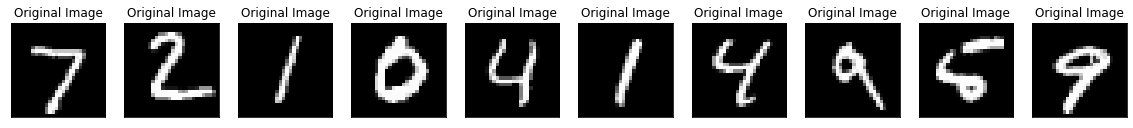

In [12]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

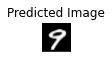

In [16]:
## display reconstruction
ax = plt.subplot(2, n, i + 1 + n)
ax.set_title("Predicted Image")
plt.imshow(test_pred_y[i].reshape(H, W))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("/content/deep_autoencoder.png")